In [11]:
import subprocess
import numpy as np
from runner import Runner
import matplotlib.pyplot as plt

In [12]:
runner = Runner()
model_name = "d_reflector"
model_file = "C://development//optix//OptixRCS//resources//" + model_name+".obj"
csv_file_vs = "C://development//optix//OptixRCS//output//"+ model_name + '_rcs.csv'
csv_file = "../output/" +model_name + '_rcs.csv'

runner.model_file = model_file
runner.csv_file = csv_file_vs
runner.freq=15E9
runner.phi_start=0
runner.phi_end=90
runner.phi_interval=0.025
runner.theta_start=90
runner.theta_end=90
runner.rays_per_wavelength=10
runner.generate_json()
runner.run()

In [13]:
csv = np.genfromtxt (csv_file, delimiter=",")

csv = csv[~np.isnan(csv[:,3])]
# Extract phi and rcs columns from the DataFrame
freq_values = csv[:,0]
phi_values = csv[:,1]
theta_values = csv[:,2]
rcs_values = csv[:,3]
print(rcs_values.shape)
print("rcs max: ", max(rcs_values))
print("rcs min: ", min(rcs_values))

(3601,)
rcs max:  47.9688
rcs min:  -14.3712


In [14]:
raytr_csv_file = '../output/d_3600_raytramp.csv'
raytr_data = np.genfromtxt (raytr_csv_file, delimiter=",")

raytr_data = raytr_data[~np.isnan(raytr_data[:,1])]
# Extract phi and rcs columns from the DataFrame
# freq_values = csv[:,0]
# phi_values = csv[:,1]
# theta_values = csv[:,2]
raytr_rcs_values = 10*np.log10(raytr_data[:,1])
print(raytr_rcs_values.shape)
print("rcs max: ", max(raytr_rcs_values))
print("rcs min: ", min(raytr_rcs_values))

(3601,)
rcs max:  47.94878248376257
rcs min:  -22.85318252272319


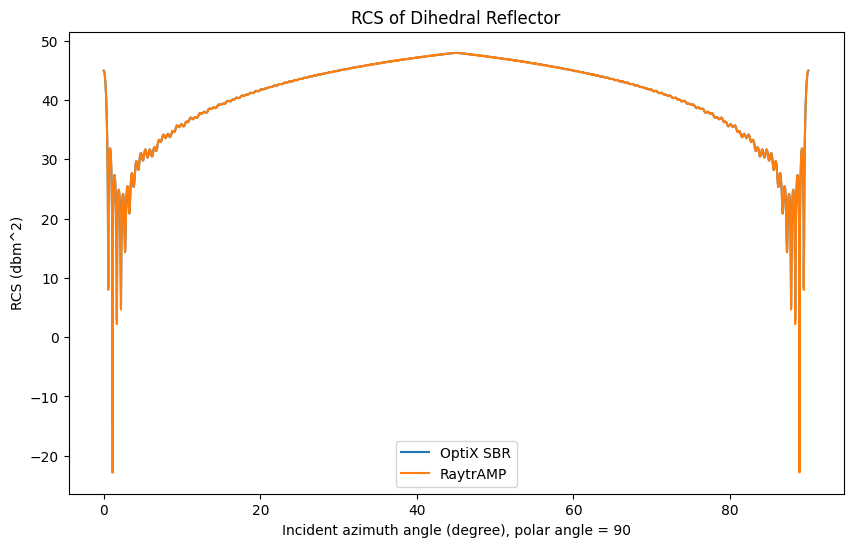

In [15]:
# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(phi_values, rcs_values, label="OptiX SBR")
plt.plot(phi_values, raytr_rcs_values, label="RaytrAMP")
plt.xlabel('Incident azimuth angle (degree), polar angle = 90')  # X-axis label
plt.ylabel('RCS (dbm^2)')  # Y-axis label
plt.title('RCS of Dihedral Reflector')  # Plot title
plt.legend()
plt.show()  # Display the plot